# Wine Quality - Spiralytics

In [1004]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Prepare Data for Model

1. Remove all rows with missing data
2. Add target column to represent "poor" (3,4), "normal"(5,6,7), "excellent"(8,9)
3. Split white wine and red wine into 2 different DataFrames

In [1005]:
# Import CSV file
wine_quality = pd.read_csv("wine-quality.csv")
wine_quality["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [1006]:
# 1 - Remove all rows with missing data
wine_quality.dropna(inplace=True)
wine_quality.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1007]:
wine_quality.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1008]:
wine_quality.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [1009]:
# 2 - Add target column to represent "poor" (3,4), "normal"(5,6,7), "excellent"(8,9)
def set_target(row):
    if row["quality"] >= 8:
        return 2
    elif row["quality"] < 6:
        return 0
    elif row["quality"] >=6 & row["quality"] < 8:
        return 1
    
    
wine_quality = wine_quality.assign(target=wine_quality.apply(set_target, axis=1))
#wine_quality.rename(columns={'quality': 'target'}, inplace=True)
wine_quality["target"].value_counts()

1    3894
0    2372
2     197
Name: target, dtype: int64

In [1010]:
# Testing target column has correct values 
#wine_quality[(wine_quality["quality"] == 8) & (wine_quality["target"] == 1)]

In [1011]:
# Dropping quality column
wine_quality.drop("quality", axis=1, inplace=True)

In [1012]:
# 3 - Split white wine and red wine into 2 different DataFrames
white_wine = wine_quality[wine_quality["type"] == "white"]
red_wine = wine_quality[wine_quality["type"] == 'red']
white_wine.drop("type", axis=1, inplace=True)
red_wine.drop("type", axis=1, inplace=True)


/Users/branlewalk/courses/C964/env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1058]:
# Sample data for "About" page

#white_wine.to_csv('white.csv', index=False)
#red_wine.to_csv('red.csv', index=False)
sample_white = pd.read_csv('white.csv')
sample_red = pd.read_csv('red.csv')

In [1059]:
sample_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12.0,0
1,8.6,0.23,0.40,4.20,0.035,17,109,0.9947,3.14,0.53,9.7,0
2,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,1
3,8.1,0.22,0.43,1.50,0.044,28,129,0.9938,3.22,0.45,11.0,1
4,6.2,0.66,0.48,1.20,0.029,29,75,0.9892,3.33,0.39,12.8,2
5,6.7,0.23,0.31,2.10,0.046,30,96,0.9926,3.33,0.64,10.7,2


In [1060]:
sample_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,5.7,1.130,0.09,1.5,0.172,7,19,0.9940,3.50,0.48,9.8,0
1,9.5,0.370,0.52,2.0,0.082,6,26,0.9980,3.18,0.51,9.5,0
2,8.1,0.380,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7,1
3,13.7,0.415,0.68,2.9,0.085,17,43,1.0014,3.06,0.80,10.0,1
4,10.3,0.320,0.45,6.4,0.073,5,13,0.9976,3.23,0.82,12.6,2
5,5.6,0.850,0.05,1.4,0.045,12,88,0.9924,3.56,0.82,12.9,2


In [1014]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [1015]:
red_wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [1016]:
red_wine["target"].value_counts()

1    833
0    742
2     18
Name: target, dtype: int64

### Datasets 

In [1017]:
# Create X and y for K-Means Clustering and Classification Model

# Red Wine Datasets
red_x = red_wine.drop("target", axis=1)
red_y = red_wine["target"]


# White Wine Datasets
white_x = white_wine.drop("target", axis=1)
white_y = white_wine["target"]

# Scale X
red_x_scaled = StandardScaler().fit_transform(red_x)
white_x_scaled = StandardScaler().fit_transform(white_x)

white_x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## PCA

In [1018]:
pca = PCA(n_components=2)

red_pc = pca.fit_transform(red_x_scaled)
white_pc = pca.fit_transform(white_x)

red_principle_DF = pd.DataFrame(data=red_pc,
                           columns=['pc1','pc2'])
white_principle_DF = pd.DataFrame(data=white_pc,
                           columns=['pc1','pc2'])
red_principle_DF

,pc1,pc2
0,-1.629325,0.458198
1,-0.803922,1.858520
2,-0.755760,0.885060
3,2.349197,-0.266766
4,-1.629325,0.458198
...,...,...
1588,-1.238658,0.929627
1589,-2.153319,0.817738
1590,-1.457304,0.311991
1591,-2.272376,0.982744


In [1019]:
red_principle_DF['target'] = red_y.values
white_principle_DF['target'] = white_y.values
red_principle_DF

,pc1,pc2,target
0,-1.629325,0.458198,0
1,-0.803922,1.858520,0
2,-0.755760,0.885060,0
3,2.349197,-0.266766,1
4,-1.629325,0.458198,0
...,...,...,...
1588,-1.238658,0.929627,1
1589,-2.153319,0.817738,0
1590,-1.457304,0.311991,1
1591,-2.272376,0.982744,0


In [1020]:
red_principle_DF["target"].value_counts()

1    833
0    742
2     18
Name: target, dtype: int64

In [1021]:
white_principle_DF["target"].value_counts()

1    3061
0    1630
2     179
Name: target, dtype: int64

## K-Means Clustering

1. Create elbow graph - confirm that there are 3 clusters
2. Create plot method
2. Plot 2 graphs for each Wine based on PCA

In [1022]:
## 1.) Elbow Method to find cluster target
def find_cluster_target(dataframe, wine):
    ks = range(1, 10)
    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)

        # Fit model to samples
        model.fit(dataframe.iloc[:,:3])

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    plt.plot(ks, inertias, '-o', color='black')
    plt.title('{} Wine'.format(wine))
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

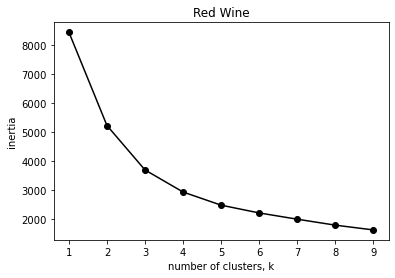

In [1023]:
find_cluster_target(red_principle_DF, "Red")

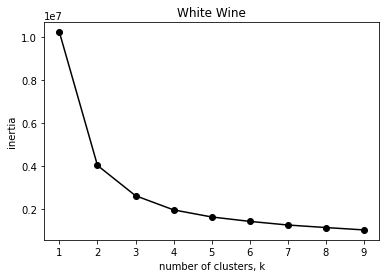

In [1024]:
find_cluster_target(white_principle_DF, "White")

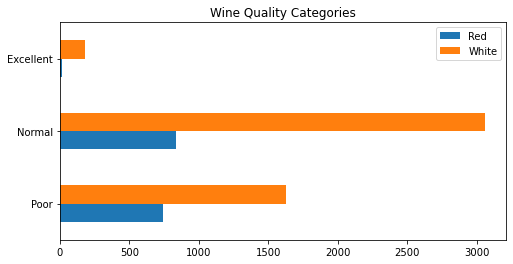

In [1051]:
## Amounts of each quality class
amounts = ([742, 1630],
           [833, 3061],
           [18, 179])

wine_df = pd.DataFrame(amounts,
                       index=["Poor","Normal", "Excellent"],
                       columns=["Red", "White"])

wine_df.plot(kind='barh', title='Wine Quality Categories', figsize=(8,4));

In [1026]:
# 2) Create plot method
# Add bar H of value counts for both sets
# explain the difference in PCA results vs K Means
# Reorganize notes and update


def run_plots(dataframe, wine):
    
    from sklearn.cluster import KMeans
    from sklearn.cluster import SpectralClustering
    from sklearn import preprocessing
    
    # Applying k-means to the dataset
    kmeans=KMeans(n_clusters=3, random_state=1, max_iter=1000, n_init=10)

    x = dataframe.drop('target', axis=1)
    y = dataframe['target']

    #y_kmeans=kmeans.fit_predict(x)
    y_kmeans = kmeans.fit_predict(x)
    #predicted_kmeans = kmeans.predict(x, sample_weight = y)


    # 3 subplots
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10));
    # before k_means


    scatter= ax0.scatter(x=dataframe['pc1'],
                         y=dataframe['pc2'],
                         c=dataframe['target'])
    ax0.set(title='2 component PCA for {} Wine'.format(wine),
            xlabel='Principal Component 1',
            ylabel='Principal Component 2');
    ax0.legend(*scatter.legend_elements(), title="Target");

    # With K-Means
    scatter= ax1.scatter(x=x.iloc[:,0],
                         y=x.iloc[:,1],
                         c=y_kmeans)

    ax1.set(title="K-means of 2 components for {} Wine".format(wine),
            xlabel='Principal Component 1',
            ylabel='Principal Component 2');
    ax1.legend(*scatter.legend_elements(), title="Target");
    
    fig.savefig("static/images/{}-wine-pca.png".format(wine))

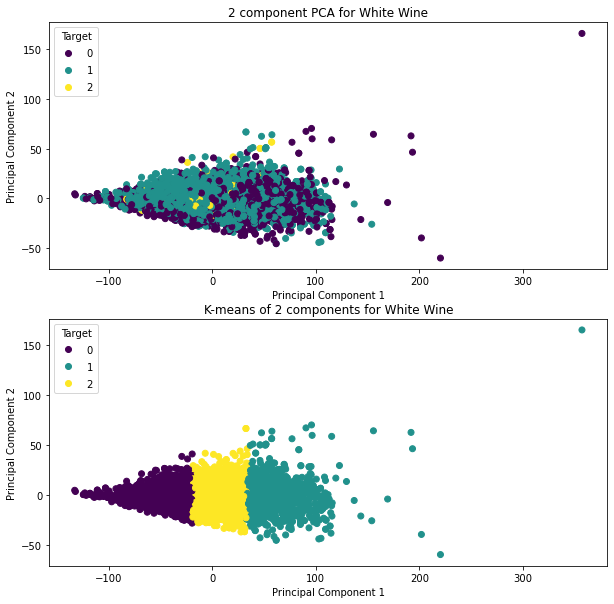

In [1027]:
run_plots(white_principle_DF, "White")

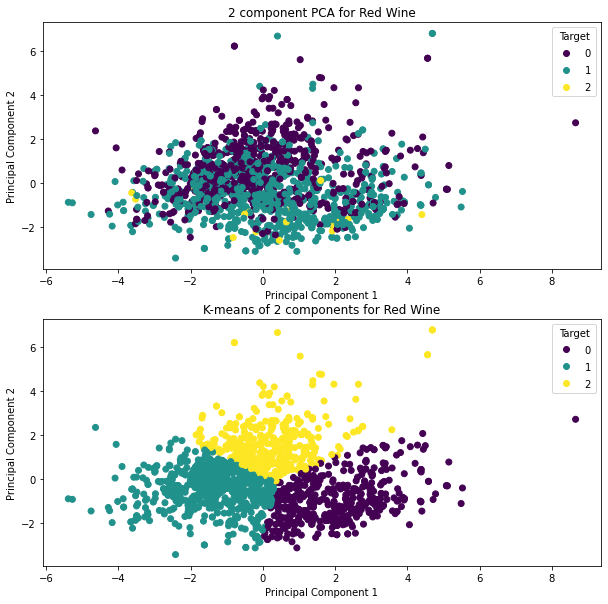

In [1028]:
run_plots(red_principle_DF, "Red")

In [1029]:
y.value_counts()

1    3061
0    1630
2     179
Name: target, dtype: int64

### Previous assessment of K-Means Clustering using Feature Selection

### Feature Selection

Top Four Features for Red Wine:

* Alcohol
* Sulphates
* Total Sulfur Dioxide
* Volatile Acidity
    
Top Four Features for White Wine:

* Alcohol
* Volatile Acidity
* Density
* Free Sulfur Dioxide

[0.06787645 0.10155505 0.07660046 0.06746264 0.07086706 0.06774279
 0.10368115 0.08265932 0.06997645 0.11615837 0.17542024]


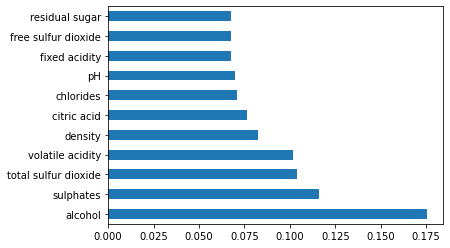

In [1030]:
# Best Feature Selection for Red Wines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = red_x.iloc[:,0:11]
y = red_y
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

[0.07531047 0.11134009 0.08438685 0.07852609 0.07904729 0.09264553
 0.08412117 0.08888138 0.07837324 0.07476326 0.15260464]


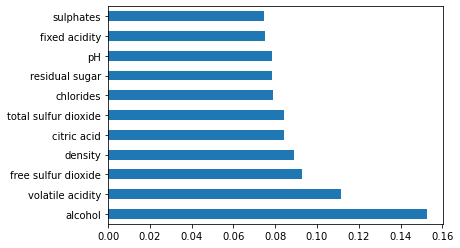

In [1031]:
# Best Feature Selection for White Wines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = white_x.iloc[:,0:11]
y = white_y
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [1032]:
# 2 - Create plot method
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
    
def plot_Kmeans_vs_labled(wine, X, var1, var2):

    np.random.seed(42)
    
    # Choose correct set
    if wine == "Red":
        wine_X = red_x
        wine_Y = red_y
        
    elif wine == "White":
        wine_X = white_x
        wine_Y = white_y
        
    num_clus = 3
    
    # Scale features
    X = preprocessing.scale(X)

    
    wine_x, wine_test_x = train_test_split(wine_X, test_size=0.2)
    x, x_test, y, y_test = train_test_split(X, wine_Y, test_size=0.2)
    
    # Applying k-means to the dataset
    kmeans=KMeans(n_clusters=num_clus, random_state=0, max_iter=1000, algorithm="full")
    #y_kmeans=kmeans.fit_predict(x)
    
    y_kmeans = kmeans.fit_predict(x ,sample_weight = y)
    #predicted_kmeans = kmeans.predict(x, sample_weight = y)
    

    # 2 subplots
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10);
    

    # before k_means
    scatter = ax0.scatter(x=preprocessing.scale(wine_x[var1]),
                         y=preprocessing.scale(wine_x[var2]),
                         c=y);
    ax0.legend(*scatter.legend_elements(), title="Target")
    ax0.set(title="Class Labels of {} and {}".format(var1,var2),
          xlabel=var1,
          ylabel=var2);

    # With K-Means
    scatter= ax1.scatter(x=x[:,0],
                         y=x[:,1],
                         c=y_kmeans)

    ax1.set(title="K-Means Clustering of {} and {} for {} Wine".format(var1,var2,wine),
          xlabel=var1,
          ylabel=var2);
    ax1.legend(*scatter.legend_elements(), title="Target");
    
    return kmeans.score(x_test)

SyntaxError: invalid syntax (<ipython-input-1032-d417cb77e906>, line 39)

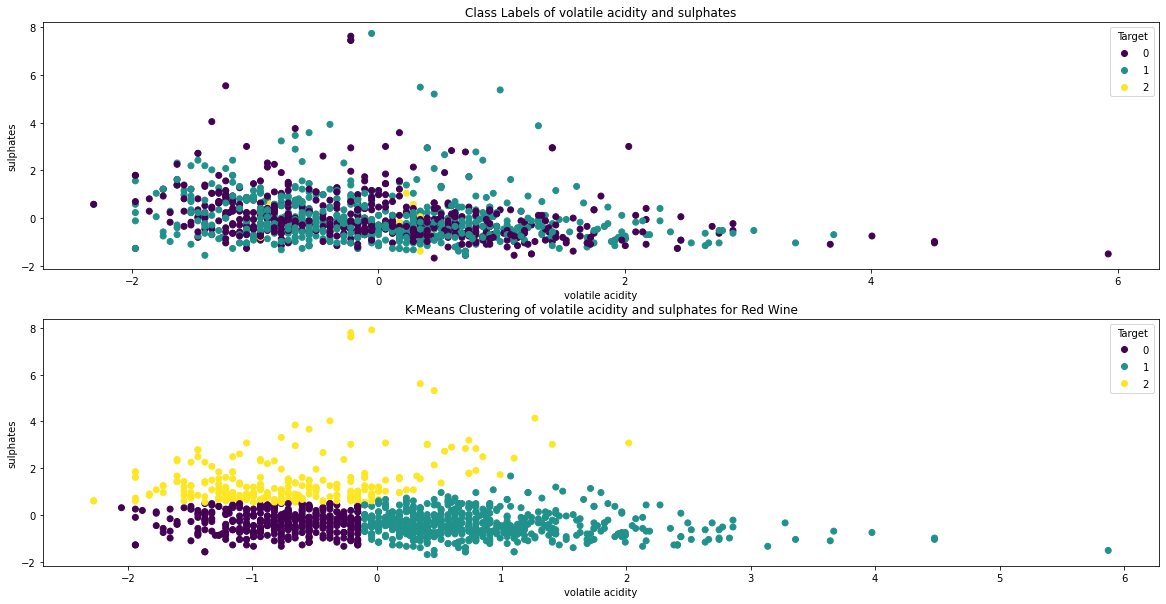

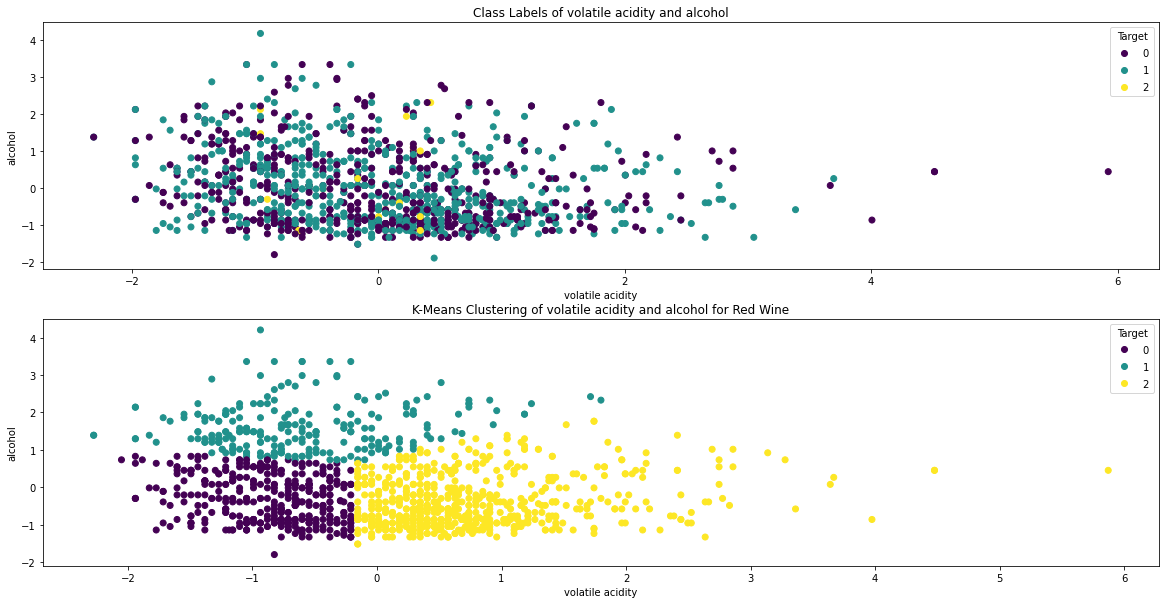

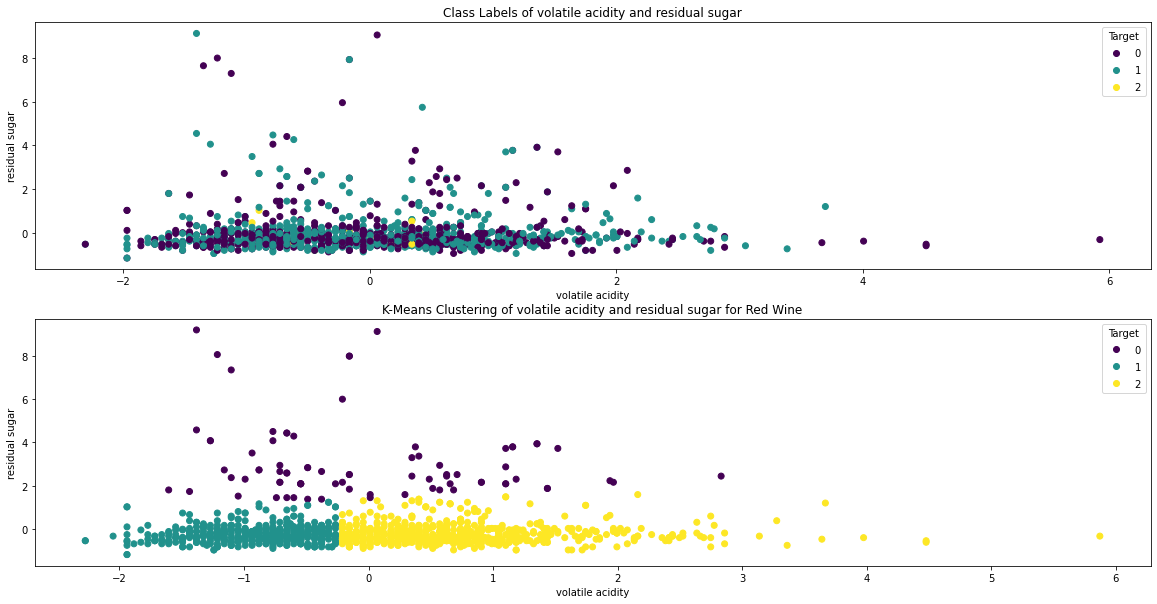

In [1033]:
# Red Wine Graphs
red_sulphates_volatile_acidity = red_x.iloc[: , [1,9]].values
red_alcohol_volatile_acidity = red_x.iloc[: , [1,10]].values
red_residual_sugar_volatile_acidity = red_x.iloc[: , [1,3]].values

rsva_score = plot_Kmeans_vs_labled("Red", red_sulphates_volatile_acidity, "volatile acidity", "sulphates")
rava_score = plot_Kmeans_vs_labled("Red", red_alcohol_volatile_acidity, "volatile acidity", "alcohol")
rrsva_score = plot_Kmeans_vs_labled("Red", red_residual_sugar_volatile_acidity, "volatile acidity", "residual sugar")

-649.7878987402785

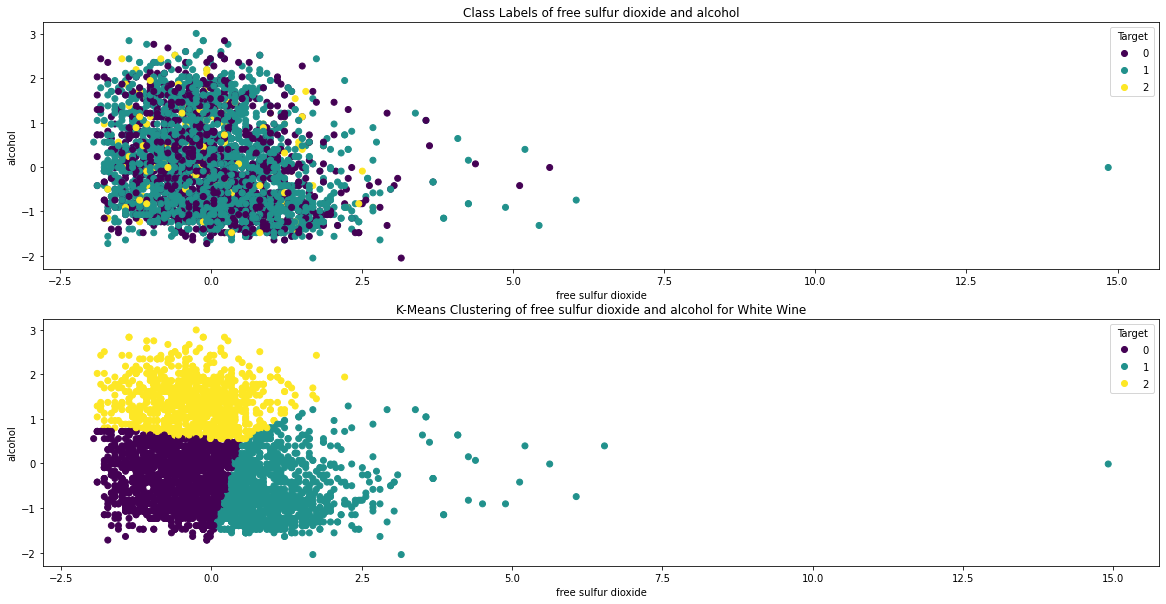

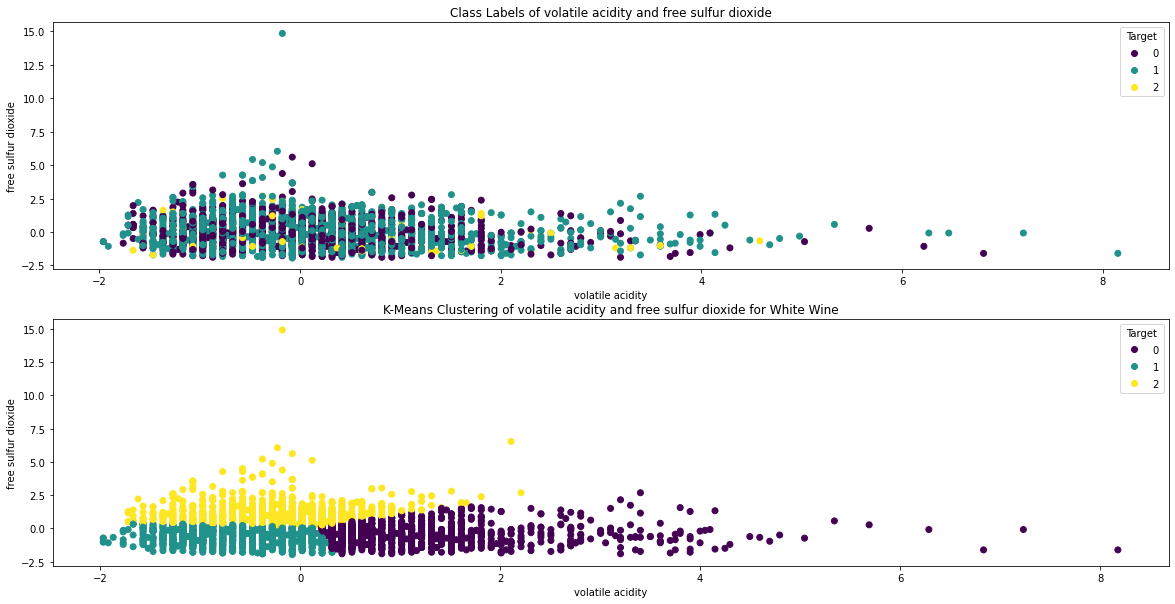

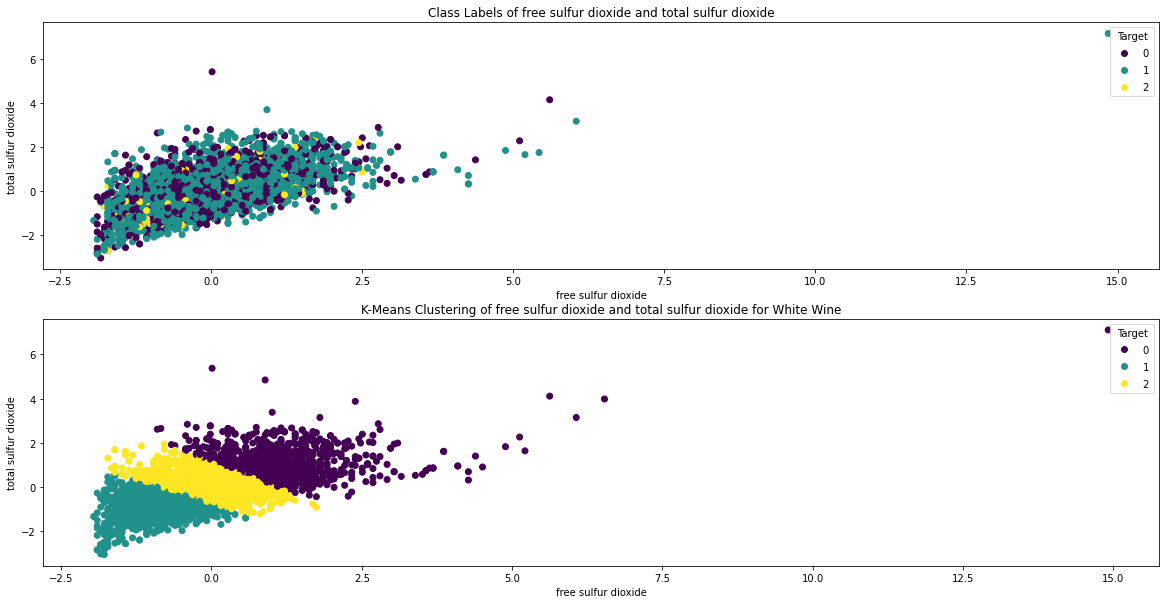

In [1034]:
# White Wine Graphs
white_alcohol_free_sulfur_dioxide = white_x.iloc[: , [5,10]].values
white_volatile_acidity_free_sulfur_dioxide = white_x.iloc[: , [1,5]].values
white_total_sulfur_dioxide_free_sulfur_dioxide = white_x.iloc[: , [5,6]].values

plot_Kmeans_vs_labled("White", white_alcohol_free_sulfur_dioxide, "free sulfur dioxide", "alcohol")
plot_Kmeans_vs_labled("White", white_volatile_acidity_free_sulfur_dioxide, "volatile acidity", "free sulfur dioxide")
plot_Kmeans_vs_labled("White", white_total_sulfur_dioxide_free_sulfur_dioxide, "free sulfur dioxide", "total sulfur dioxide")

## Classification - Predictive Model

* Uses ensemble method (decision trees) - `RandomForestClassifier()`
* Evaluate with `GridSearcCV()` - conclusion will be to stay with baseline model

In [1047]:
# Red Wines
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(25)

# Split Data into train and test sets
rx_train, rx_test, ry_train, ry_test = train_test_split(red_x, red_y, test_size=0.2)

# Instantiate the model
red_model = RandomForestClassifier(max_depth=None, 
                                   max_features='auto',
                                   min_samples_leaf=2,
                                   min_samples_split=4,
                                   n_estimators=100)
#red_model = RandomForestClassifier()
red_model.fit(rx_train, ry_train)

# Check the score
red_model.score(rx_test, ry_test)

0.786833855799373

In [1046]:
# White Wines
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(25)

# Split Data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(white_x, white_y, test_size=0.2)

# Instantiate the model
white_model = RandomForestClassifier(max_depth=None, 
                                    max_features='auto',
                                    min_samples_leaf=2,
                                    min_samples_split=4,
                                    n_estimators=100)
white_model.fit(x_train, y_train)

# Check the score
white_model.score(x_test, y_test)

0.8182751540041068

In [1037]:
# Shuffle Data
red_wine_shuffled = red_wine.sample(frac=1)
white_wine_shuffled = white_wine.sample(frac=1)

# Red Wine Datasets
red_x = red_wine_shuffled.drop("target", axis=1)
red_y = red_wine_shuffled["target"]

# White Wine Datasets
white_x = white_wine_shuffled.drop("target", axis=1)
white_y = white_wine_shuffled["target"]

In [1038]:
from sklearn.model_selection import GridSearchCV

np.random.seed(25)

grid = {"n_estimators": [10,100],
       "max_depth": [None, 10],
       "max_features": ["auto"],
       "min_samples_split": [2,4],
       "min_samples_leaf": [2,4]}


# Split into test and train sets
x_train, x_test, y_train, y_test = train_test_split(red_x, red_y,test_size=0.2)

# Instaniate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5,
                      verbose=2)

# Fir the GridSearchCV version of CLF
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

KeyboardInterrupt: 

In [1044]:
from sklearn.model_selection import GridSearchCV

np.random.seed(25)

grid = {"n_estimators": [10,100],
       "max_depth": [None, 10],
       "max_features": ["auto"],
       "min_samples_split": [2,4],
       "min_samples_leaf": [2,4]}


# Split into test and train sets
x_train, x_test, y_train, y_test = train_test_split(white_x, white_y,test_size=0.2)

# Instaniate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5,
                      verbose=2)

# Fir the GridSearchCV version of CLF
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=aut

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_lea

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   21.9s finished


In [1045]:
# Best Parameters from GridSearcCV
"""
{'{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 10}}
"""
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [1040]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_score(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='macro')
    recall = recall_score(y_true, y_preds, average='macro')
    f1 = f1_score(y_true, y_preds, average='macro')
    metric_dict = {"accuracy": accuracy,
                  "precision": precision,
                  "recall": recall,
                  "f1": f1}
    print("Accuracy: {0:.02f}%".format(accuracy*100))
    print("Precision: {0:.02f}".format(precision))
    print("Recall: {0:.02f}".format(recall))
    print("F1 score: {0:.02f}".format(f1))
    
    return metric_dict

In [1048]:
# Scoring for Red_Wine
# Predictions with baseline paratmeters
print("Baseline")
bl_y_preds = red_model.predict(rx_test)

# Evaluate the Basline predictions
bl_metrics = evaluate_score(ry_test, bl_y_preds)

# Make predictions with best parameters
print("GridSearchCV")
gs_y_preds = gs_clf.predict(x_test)

# Exavluate the prediction
gs_metrics = evaluate_score(y_test, gs_y_preds)

Baseline
Accuracy: 78.68%
Precision: 0.53
Recall: 0.53
F1 score: 0.53
GridSearchCV
Accuracy: 82.34%
Precision: 0.87
Recall: 0.61
F1 score: 0.64


/Users/branlewalk/courses/C964/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

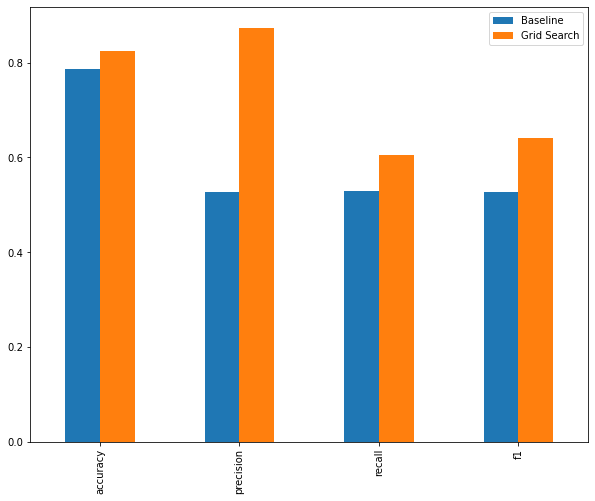

In [1049]:
# Comparing the different models based on the different hyperparameters
compare_metrics = pd.DataFrame({"Baseline": bl_metrics,
                                "Grid Search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

## Save Model for Flask Server
* use joblib to export file for web application

In [1043]:
from joblib import dump, load

# save models to file
dump(red_model, filename="red_wine_model.joblib")
dump(white_model, filename="white_wine_model.joblib")

['white_wine_model.joblib']